In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from adjustText import adjust_text
import sklearn.metrics as metrics

# word2vec
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocess
import datetime
import statistics 

In [8]:
data = pd.read_csv("/gpfs/data/iime/data/admissions/adm_research_aptitude.csv")
data = data.applymap(str)
data.head(10)

,AMCAS_ID,APP_YEAR,EXPERIENCE_NAME,EXPERIENCE_DESCR,MEANINGFUL_EXPERIENCE_DESCR,ORGANIZATION_NAME,START_DATE,END_DATE,TOTAL_HOURS,FACULTY_ID,APTITUDE_SCORE,APPLICATION_RANK
0,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Jun-98,1-Jul-98,340.0,1839.0,1.0,3.0
1,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Jun-98,1-Jul-98,340.0,1866.0,3.0,3.0
2,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Aug-97,1-May-98,600.0,1839.0,1.0,3.0
3,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Aug-98,1-May-99,600.0,1866.0,3.0,3.0
4,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Jun-99,1-Jul-99,340.0,1839.0,1.0,3.0
5,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Jun-99,1-Jul-99,340.0,1866.0,3.0,3.0
6,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Aug-98,1-May-99,600.0,1839.0,1.0,3.0
7,10792888,2014,Independent Study and Research Assistant - Duk...,"(Full-time paid position during the summers, 1...",nan,"Duke Univ Hospital, Div of Infectious Diseases...",1-Aug-97,1-May-98,600.0,1866.0,3.0,3.0
8,10989856,2014,Ultrasound Study,I began my first summer of research going thro...,nan,"Hepatobiliary, Pancreatic, and Transplant Surg...",1-Jun-10,1-Aug-10,320.0,12091.0,3.0,1.0
9,10989856,2014,Ultrasound Study,I began my first summer of research going thro...,nan,"Hepatobiliary, Pancreatic, and Transplant Surg...",1-Jun-11,1-Aug-11,320.0,12095.0,2.0,1.0


In [9]:
len(data)

81242

In [10]:
from src import preprocess_research as preprocess_research

apt_z = preprocess_research.graph_aptitude_z_score(data,'EXPERIENCE_DESCR')

print()# og_df, columnName, apt_score = True
df_reg = preprocess_research.process_reg(data, 'EXPERIENCE_DESCR')

print() # og_df, columnName, apt_score = True, input_= True
df_apt = preprocess_research.process_all(data, 'EXPERIENCE_DESCR')
print()
df_z_input = preprocess_research.process_all(data, 'EXPERIENCE_DESCR', False)
print()
df_z_output = preprocess_research.process_all(data, 'EXPERIENCE_DESCR', False, False)

SpecificationError: nested renamer is not supported

In [5]:
# df_z_output.head()

/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


aptitude:  0.38993377809507396  z score:  0.38830900273257674


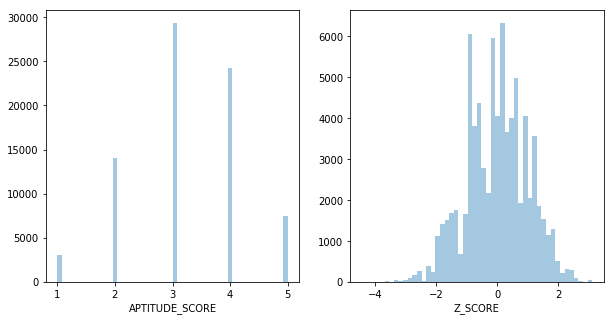

In [6]:
apt_z.head()
apt_z = apt_z.dropna()
fig, ax =plt.subplots(1,2,figsize=(10,5))
sns.distplot(apt_z['APTITUDE_SCORE'], ax=ax[0], kde=False)
sns.distplot(apt_z['Z_SCORE'], ax=ax[1], kde=False)
fig.show()

print("aptitude: ", len(apt_z[apt_z.APTITUDE_SCORE >= 4.0]) / len(data), " z score: ", len(apt_z[apt_z.Z_SCORE >= 0.25])/len(data))


In [7]:
from src import word2vec as w2v
# word2vec(og_df, columnName, tdif, word_embedding_size=300, train_algo)
# tfid = true, includes tfidf weights
# word_embedding = 300, (default)
# train_algo = 0 = cbow, (default) 
# train_algo = 1 = skipgram

df_reg1 = w2v.word2vec(df_reg, 'EXPERIENCE_DESCR',True, 300,0)
df_reg2 = w2v.word2vec(df_reg, 'EXPERIENCE_DESCR',False, 300,0)

df_apt1 = w2v.word2vec(df_apt, 'EXPERIENCE_DESCR',True, 300,0)
df_apt2 = w2v.word2vec(df_apt, 'EXPERIENCE_DESCR',False, 300,0)
df_apt1_skip = w2v.word2vec(df_apt, 'EXPERIENCE_DESCR',True, 300,1)
df_apt2_skip = w2v.word2vec(df_apt, 'EXPERIENCE_DESCR',False, 300,1)

df_z1_input = w2v.word2vec(df_z_input, 'EXPERIENCE_DESCR',True, 300,0)
df_z2_input = w2v.word2vec(df_z_input, 'EXPERIENCE_DESCR', False, 300,0)
df_z1_input_skip = w2v.word2vec(df_z_input, 'EXPERIENCE_DESCR',True, 300,1)
df_z2_input_skip = w2v.word2vec(df_z_input, 'EXPERIENCE_DESCR',False, 300,1)

df_z1_input_pretrained = w2v.word2vec_pretrained(df_z_input, 'EXPERIENCE_DESCR',True)
df_z2_input_pretrained = w2v.word2vec_pretrained(df_z_input, 'EXPERIENCE_DESCR',False)

df_z1_output = w2v.word2vec(df_z_output, 'EXPERIENCE_DESCR',True, 300,0)
df_z2_output = w2v.word2vec(df_z_output, 'EXPERIENCE_DESCR', False, 300,0)
df_z1_output_skip = w2v.word2vec(df_z_output, 'EXPERIENCE_DESCR',True, 300,1)
df_z2_output_skip = w2v.word2vec(df_z_output, 'EXPERIENCE_DESCR',False, 300,1)

0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed


In [8]:
def split(df, outcome):
    remove = ['AMCAS_ID', 'MEAN_DIFF', 'APP_YEAR', 'EXPERIENCE_DESCR', 'FACULTY_ID', 'MONTHS']
    cols_to_drop = []
    for r in remove:
        if r in df.columns:
            cols_to_drop.append(r)
    if (outcome == 'Z_SCORE'):
        cols_to_drop.append('APTITUDE_SCORE')

    data_only_df = pd.DataFrame(df).drop(columns=cols_to_drop)
    data_only_df.head()
    # Separate the features and the response
    X = data_only_df.drop(outcome, axis=1)
    Y = data_only_df[outcome].astype(int)

    # 80% of data goes to training
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)
#     print(y_test.value_counts())
#     return x_train, x_test, y_train, y_test
    return {"x_train": x_train.values, "x_test": x_test.values, "y_train": y_train.values, 
            "y_test": y_test.values}

In [9]:
reg_outcome = split(df_reg1, 'APTITUDE_SCORE')
reg_outcome2 = split(df_reg2, 'APTITUDE_SCORE')

apt_outcome = split(df_apt1, 'APTITUDE_SCORE')
apt_outcome2 = split(df_apt2, 'APTITUDE_SCORE')
apt_outcome_skip = split(df_apt1_skip, 'APTITUDE_SCORE')
apt_outcome2_skip = split(df_apt2_skip, 'APTITUDE_SCORE')

z_outcome_input = split(df_z1_input, 'APTITUDE_SCORE')
z_outcome2_input = split(df_z2_input, 'APTITUDE_SCORE')
z_outcome_input_skip = split(df_z1_input_skip, 'APTITUDE_SCORE')
z_outcome2_input_skip = split(df_z2_input_skip, 'APTITUDE_SCORE')

z_outcome_input_pretrained = split(df_z1_input_pretrained, 'APTITUDE_SCORE')
z_outcome2_input_pretrained = split(df_z2_input_pretrained, 'APTITUDE_SCORE')

z_outcome_output = split(df_z1_output, 'Z_SCORE')
z_outcome2_output = split(df_z2_output, 'Z_SCORE')
z_outcome_output_skip = split(df_z1_output_skip, 'Z_SCORE')
z_outcome2_output_skip = split(df_z2_output_skip, 'Z_SCORE')

In [10]:
model_lists = {
               'discordant_aptitude_score_outcome_tdif' : reg_outcome,
               'discordant_aptitude_score_outcome' : reg_outcome2,
               
               'concordant_aptitude_score_outcome_tdif' : apt_outcome,
               'concordant_aptitude_score_outcome' : apt_outcome2,
               'concordant_aptitude_score_outcome_tdif (skip gram)' : apt_outcome_skip,
               'concordant_aptitude_score_outcome (skip gram)' : apt_outcome2_skip,
               
               'z_score_outcome_input_tdif': z_outcome_input,
               'z_score_outcome_input': z_outcome2_input,
               'z_score_outcome_input_tdif (skip gram)': z_outcome_input_skip,
               'z_score_outcome_input (skip gram)': z_outcome2_input_skip,
               
               'z_outcome_input_tdif_pretrained': z_outcome_input_pretrained,
               'z_outcome2_input_pretrained': z_outcome2_input_pretrained,
               
               'z_score_outcome_output_tdif': z_outcome_output,
               'z_score_outcome_output': z_outcome2_output,
               'z_score_outcome_output_tdif (skip gram)': z_outcome_output_skip,
               'z_score_outcome_output (skip gram)': z_outcome2_output_skip,
              }

In [11]:
import itertools

from sklearn.linear_model import SGDClassifier, LogisticRegression, ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, auc, make_scorer
# import lightgbm as lgb

classifiers = {'sdg': SGDClassifier(),
               'log_reg': LogisticRegression(),  
               'gnb': GaussianNB(),
               'forest': RandomForestClassifier(),
               'xgb': XGBClassifier()
              }


/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.model_selection import cross_validate

In [14]:
for n, d in model_lists.items():
    
    print("Model: {}".format(n))
    
    x_train = (d["x_train"])
    x_train =  pd.DataFrame(x_train).fillna(0)
    x_train = x_train.to_numpy()
    x_test = (d["x_test"])

    y_train = d["y_train"]
    y_test = d["y_test"]
    
    train_clf = {}

    for k, v in classifiers.items():

        train_clf[k] = v.fit(x_train, y_train)
        scores = cross_validate(v, x_train, y_train, cv = 10,
                                scoring = {"roc_auc", "accuracy", "precision", "recall", "average_precision","f1"})
        
        scr1 = np.mean(scores['test_roc_auc'])
        scr2 = np.mean(scores['test_accuracy'])
        scr3 = np.mean(scores['test_precision'])
        scr4 = np.mean(scores['test_recall'])
        scr5 = np.mean(scores['test_average_precision'])
        scr6 = np.mean(scores['test_f1'])


        print("{}, AUC-ROC: {}, Accuracy: {}, Precision: {}, Recall: {}, Avg. Precision: {},  F1 Score: {}".format(k, round(scr1,2), round(scr2, 2),
                                                                     round(scr3, 2), round(scr4, 2), round(scr5, 2), round(scr6, 2)))
    print()


Model: discordant_aptitude_score_outcome_tdif
sdg, AUC-ROC: 0.62, Accuracy: 0.48, Precision: 0.21, Recall: 0.6, Avg. Precision: 0.38,  F1 Score: 0.25
log_reg, AUC-ROC: 0.79, Accuracy: 0.8, Precision: 0.63, Recall: 0.28, Avg. Precision: 0.55,  F1 Score: 0.39
gnb, AUC-ROC: 0.64, Accuracy: 0.67, Precision: 0.34, Recall: 0.47, Avg. Precision: 0.39,  F1 Score: 0.39
forest, AUC-ROC: 0.7, Accuracy: 0.77, Precision: 0.5, Recall: 0.14, Avg. Precision: 0.38,  F1 Score: 0.22
xgb, AUC-ROC: 0.76, Accuracy: 0.79, Precision: 0.57, Recall: 0.34, Avg. Precision: 0.5,  F1 Score: 0.43

Model: discordant_aptitude_score_outcome
sdg, AUC-ROC: 0.31, Accuracy: 0.72, Precision: 0.02, Recall: 0.1, Avg. Precision: 0.19,  F1 Score: 0.04
log_reg, AUC-ROC: 0.79, Accuracy: 0.8, Precision: 0.63, Recall: 0.28, Avg. Precision: 0.55,  F1 Score: 0.39
gnb, AUC-ROC: 0.7, Accuracy: 0.76, Precision: 0.46, Recall: 0.41, Avg. Precision: 0.45,  F1 Score: 0.43
forest, AUC-ROC: 0.68, Accuracy: 0.77, Precision: 0.5, Recall: 0.14, 

gnb, AUC-ROC: 0.77, Accuracy: 0.76, Precision: 0.55, Recall: 0.56, Avg. Precision: 0.61,  F1 Score: 0.55
forest, AUC-ROC: 0.78, Accuracy: 0.78, Precision: 0.69, Recall: 0.3, Avg. Precision: 0.54,  F1 Score: 0.42
xgb, AUC-ROC: 0.85, Accuracy: 0.82, Precision: 0.7, Recall: 0.54, Avg. Precision: 0.7,  F1 Score: 0.61

Model: z_score_outcome_output (skip gram)
sdg, AUC-ROC: 0.56, Accuracy: 0.46, Precision: 0.16, Recall: 0.6, Avg. Precision: 0.43,  F1 Score: 0.25
log_reg, AUC-ROC: 0.87, Accuracy: 0.83, Precision: 0.75, Recall: 0.52, Avg. Precision: 0.73,  F1 Score: 0.61
gnb, AUC-ROC: 0.85, Accuracy: 0.81, Precision: 0.7, Recall: 0.49, Avg. Precision: 0.69,  F1 Score: 0.58
forest, AUC-ROC: 0.77, Accuracy: 0.78, Precision: 0.67, Recall: 0.31, Avg. Precision: 0.54,  F1 Score: 0.42
xgb, AUC-ROC: 0.85, Accuracy: 0.82, Precision: 0.71, Recall: 0.55, Avg. Precision: 0.7,  F1 Score: 0.62



In [15]:
# hyper tuning best model
best_f1_score = 'z_score_outcome_input_tdif (skip gram)'

x_train = (model_lists[best_f1_score]["x_train"])
x_train =  pd.DataFrame(x_train).fillna(0)
x_train = x_train.to_numpy()
x_test = (model_lists[best_f1_score]["x_test"])

y_train = model_lists[best_f1_score]["y_train"]
y_test = model_lists[best_f1_score]["y_test"]

In [16]:
model = XGBClassifier()
best_model = model.fit(x_train, y_train)

--------Training Data----------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5314
          1       1.00      1.00      1.00      2188

avg / total       1.00      1.00      1.00      7502

AUROC: 1.0
--------Testing Data----------
             precision    recall  f1-score   support

          0       0.87      0.90      0.89      1356
          1       0.72      0.64      0.68       520

avg / total       0.83      0.83      0.83      1876

AUROC: 0.8833517699115043


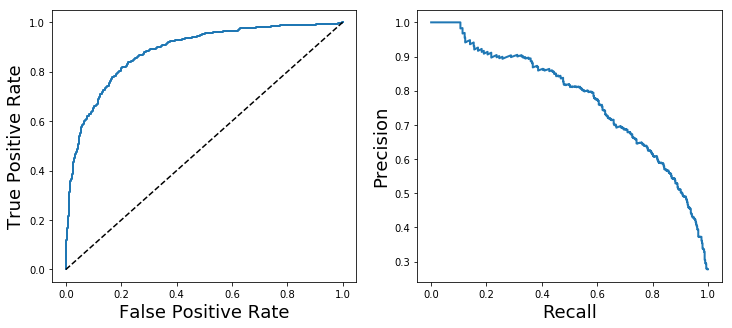

In [17]:
from src import results
# results.print_confusion_matrix(best_model, x_test, x_train, y_test, y_train)
results.train_test_reports(best_model, x_test, x_train, y_test, y_train)
results.plot_roc_curve(best_model, x_test, x_train, y_test, y_train)

In [18]:
from sklearn.metrics import confusion_matrix
y_score = best_model.predict(x_test)
    
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_score)) 

Confusion Matrix :
[[1227  129]
 [ 186  334]]
